In [1]:
#System
import sys

# Data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Data visualization
import pickle
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Model and performance
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Oversampling and under sampling
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

#Impute missing
from sklearn.impute import SimpleImputer

### Abrindo aqruivo do csv

In [2]:
base = pd.read_csv('breast-cancer.csv', ',')
base

C:\Users\camil\AppData\Local\Temp\ipykernel_564\176346885.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  base = pd.read_csv('breast-cancer.csv', ',')


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


In [3]:
base.rename(columns={"tumor-size": "tumorsize"}, inplace=True)
base.rename(columns={"inv-nodes": "invnodes"}, inplace=True)
base.rename(columns={"node-caps": "nodecaps"}, inplace=True)
base.rename(columns={"deg-malig": "degmalig"}, inplace=True)
base.rename(columns={"breast-quad": "breastquad"}, inplace=True)
base

,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


### Contando quantidade de instâncias

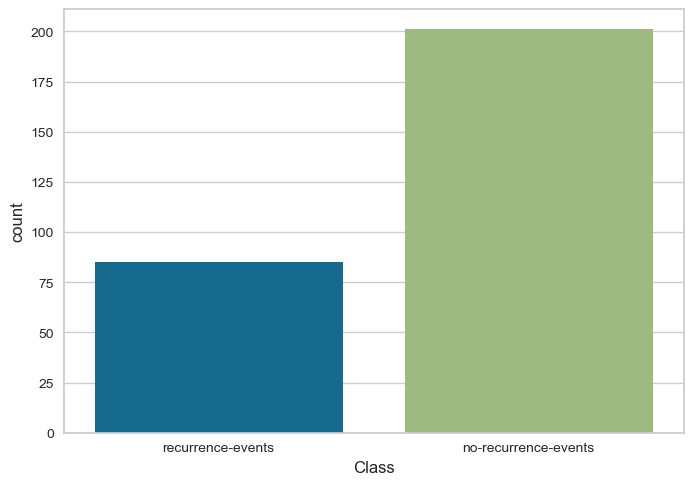

In [4]:
np.unique(base['Class'], return_counts=True), sns.countplot(x = base['Class']);

In [5]:
np.unique(base['age'], return_counts=True)#, sns.countplot(x = base['age'])

(array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object),
 array([ 1, 36, 90, 96, 57,  6], dtype=int64))

In [6]:
np.unique(base['menopause'], return_counts=True)#, sns.countplot(x = base['menopause'])

(array(['ge40', 'lt40', 'premeno'], dtype=object),
 array([129,   7, 150], dtype=int64))

In [7]:
np.unique(base['tumorsize'], return_counts=True)#, sns.countplot(x = base['tumorsize'])

(array(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
        '40-44', '45-49', '5-9', '50-54'], dtype=object),
 array([ 8, 28, 30, 50, 54, 60, 19, 22,  3,  4,  8], dtype=int64))

In [8]:
np.unique(base['invnodes'], return_counts=True)#, sns.countplot(x = base['invnodes'])

(array(['0-2', '12-14', '15-17', '24-26', '3-5', '6-8', '9-11'],
       dtype=object),
 array([213,   3,   6,   1,  36,  17,  10], dtype=int64))

((array(['?', 'no', 'yes'], dtype=object),
  array([  8, 222,  56], dtype=int64)),
 <Axes: xlabel='nodecaps', ylabel='count'>)

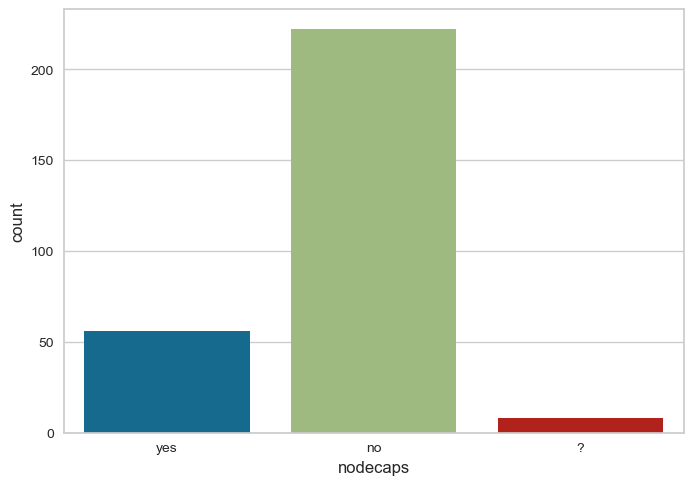

In [9]:
np.unique(base['nodecaps'], return_counts=True), sns.countplot(x = base['nodecaps'])

In [10]:
np.unique(base['degmalig'], return_counts=True)#, sns.countplot(x = base['degmalig'])

(array([1, 2, 3], dtype=int64), array([ 71, 130,  85], dtype=int64))

In [11]:
np.unique(base['breast'], return_counts=True)#, sns.countplot(x = base['breast'])

(array(['left', 'right'], dtype=object), array([152, 134], dtype=int64))

((array(['?', 'central', 'left_low', 'left_up', 'right_low', 'right_up'],
        dtype=object),
  array([  1,  21, 110,  97,  24,  33], dtype=int64)),
 <Axes: xlabel='breastquad', ylabel='count'>)

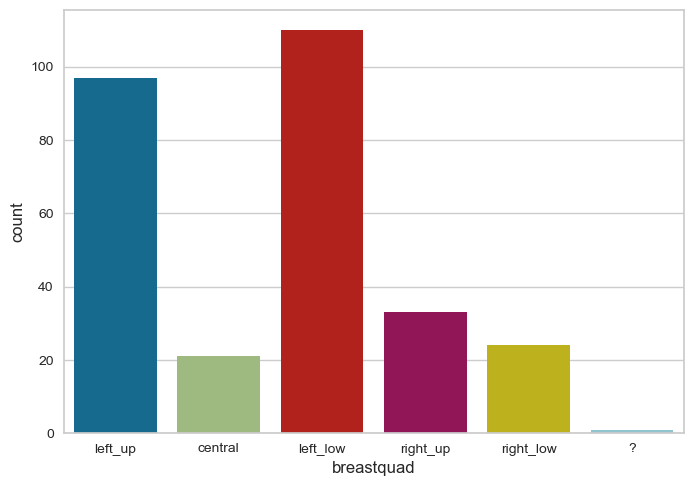

In [12]:
np.unique(base['breastquad'], return_counts=True), sns.countplot(x = base['breastquad'])

In [13]:
np.unique(base['irradiat'], return_counts=True)#, sns.countplot(x = base['irradiat'])

(array(['no', 'yes'], dtype=object), array([218,  68], dtype=int64))

### Tratamento de dados ausentes (imputação de dados)

In [14]:
base.replace('?', np.nan, inplace = True)
base.isnull().sum()

age           0
menopause     0
tumorsize     0
invnodes      0
nodecaps      8
degmalig      0
breast        0
breastquad    1
irradiat      0
Class         0
dtype: int64

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(base)
base = pd.DataFrame(imputer.fit_transform(base), columns = base.columns)

In [16]:
base.isnull().sum()

age           0
menopause     0
tumorsize     0
invnodes      0
nodecaps      0
degmalig      0
breast        0
breastquad    0
irradiat      0
Class         0
dtype: int64

### Separando os atributos de entrada e de classe

In [17]:
X_prev = base.iloc[:, 0:9].values
X_prev_label = base.iloc[:, 0:9]
X_prev_label

,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no
1,50-59,ge40,15-19,0-2,no,1,right,central,no
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no
...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no


In [18]:
y_classe = base.iloc[:, 9].values
y_classe

array(['recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrenc

### Tratamento de dados categóricos

In [19]:
label_encoder = LabelEncoder()

In [20]:
X_prev_label

,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no
1,50-59,ge40,15-19,0-2,no,1,right,central,no
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no
...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no


In [21]:
label_encoder_age = LabelEncoder()
label_encoder_menopause = LabelEncoder()
label_encoder_tumorsize = LabelEncoder()
label_encoder_invnodes = LabelEncoder()
label_encoder_nodecaps = LabelEncoder()
label_encoder_breast = LabelEncoder()
label_encoder_irradiat = LabelEncoder()

In [22]:
X_prev[:,0] = label_encoder_age.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_menopause.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_tumorsize.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_invnodes.fit_transform(X_prev[:,3])
X_prev[:,4] = label_encoder_nodecaps.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_breast.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_irradiat.fit_transform(X_prev[:,8])

In [23]:
np.set_printoptions(threshold=sys.maxsize)
X_prev

array([[2, 2, 2, 0, 1, 3, 1, 'left_up', 0],
       [3, 0, 2, 0, 0, 1, 1, 'central', 0],
       [3, 0, 6, 0, 0, 2, 0, 'left_low', 0],
       [2, 2, 6, 0, 1, 3, 1, 'left_low', 1],
       [2, 2, 5, 4, 1, 2, 0, 'right_up', 0],
       [3, 2, 4, 4, 0, 2, 1, 'left_up', 1],
       [3, 0, 7, 0, 0, 3, 0, 'left_up', 0],
       [2, 2, 1, 0, 0, 2, 0, 'left_up', 0],
       [2, 2, 0, 0, 0, 2, 1, 'right_low', 0],
       [2, 0, 7, 2, 1, 2, 1, 'left_up', 1],
       [3, 2, 4, 0, 0, 2, 0, 'left_low', 0],
       [4, 0, 2, 0, 0, 2, 1, 'left_up', 0],
       [3, 0, 5, 0, 0, 1, 1, 'central', 0],
       [3, 0, 4, 0, 0, 2, 1, 'left_up', 0],
       [2, 2, 4, 0, 0, 2, 0, 'left_low', 1],
       [1, 2, 3, 0, 0, 3, 0, 'central', 0],
       [3, 2, 1, 4, 0, 1, 1, 'left_up', 0],
       [4, 0, 2, 0, 0, 2, 1, 'left_up', 0],
       [3, 2, 7, 0, 0, 2, 0, 'left_up', 0],
       [3, 0, 3, 0, 0, 3, 0, 'left_up', 0],
       [3, 1, 3, 0, 0, 1, 0, 'left_low', 0],
       [4, 0, 7, 4, 0, 2, 1, 'left_up', 1],
       [3, 0, 2, 0, 0, 2

### Binarizar atributos não ordinais

In [24]:
onehotencoder_base = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [7])], remainder='passthrough')
X_prev= onehotencoder_base.fit_transform(X_prev)

In [25]:
X_prev

array([[0.0, 0.0, 1.0, 0.0, 0.0, 2, 2, 2, 0, 1, 3, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 3, 0, 2, 0, 0, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 3, 0, 6, 0, 0, 2, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 2, 2, 6, 0, 1, 3, 1, 1],
       [0.0, 0.0, 0.0, 0.0, 1.0, 2, 2, 5, 4, 1, 2, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 3, 2, 4, 4, 0, 2, 1, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 3, 0, 7, 0, 0, 3, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 2, 2, 1, 0, 0, 2, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 2, 2, 0, 0, 0, 2, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 2, 0, 7, 2, 1, 2, 1, 1],
       [0.0, 1.0, 0.0, 0.0, 0.0, 3, 2, 4, 0, 0, 2, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 4, 0, 2, 0, 0, 2, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 3, 0, 5, 0, 0, 1, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 3, 0, 4, 0, 0, 2, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 2, 2, 4, 0, 0, 2, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1, 2, 3, 0, 0, 3, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 3, 2, 1, 4, 0, 1, 1, 0],
       [0.0, 0

### Método de amostragem Holdout

In [26]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [27]:
y_classe.shape

(286,)

In [28]:
X_treino.shape

(228, 13)

In [29]:
X_teste.shape

(58, 13)

### Treinamento do modelo

#### Árvore de Decisão

In [30]:
AD_X_treino = X_treino
AD_y_treino = y_treino

AD_X_teste = X_teste
AD_y_teste = y_teste

AD_modelo = DecisionTreeClassifier(criterion='gini')
AD_modelo.fit(AD_X_treino, AD_y_treino)

DecisionTreeClassifier()

In [31]:
AD_previsoes = AD_modelo.predict(AD_X_teste)

In [32]:
accuracy_score(AD_y_teste, AD_previsoes)

0.6551724137931034

In [33]:
confusion_matrix(AD_y_teste, AD_previsoes)

array([[30,  6],
       [14,  8]], dtype=int64)

0.6551724137931034

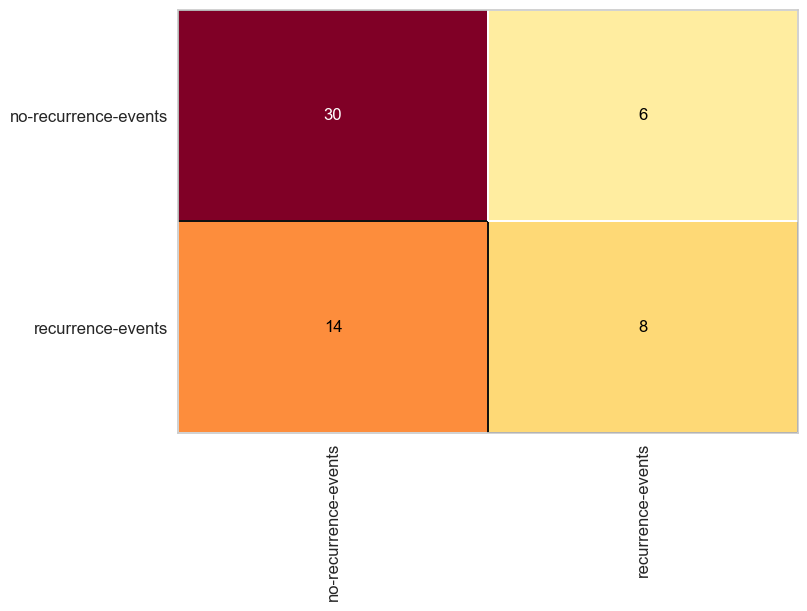

In [34]:
AD_cm = ConfusionMatrix(AD_modelo)
AD_cm.fit(AD_X_treino, AD_y_treino)
AD_cm.score(AD_X_teste, AD_y_teste)

In [35]:
print(classification_report(AD_y_teste, AD_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.68      0.83      0.75        36
   recurrence-events       0.57      0.36      0.44        22

            accuracy                           0.66        58
           macro avg       0.63      0.60      0.60        58
        weighted avg       0.64      0.66      0.63        58



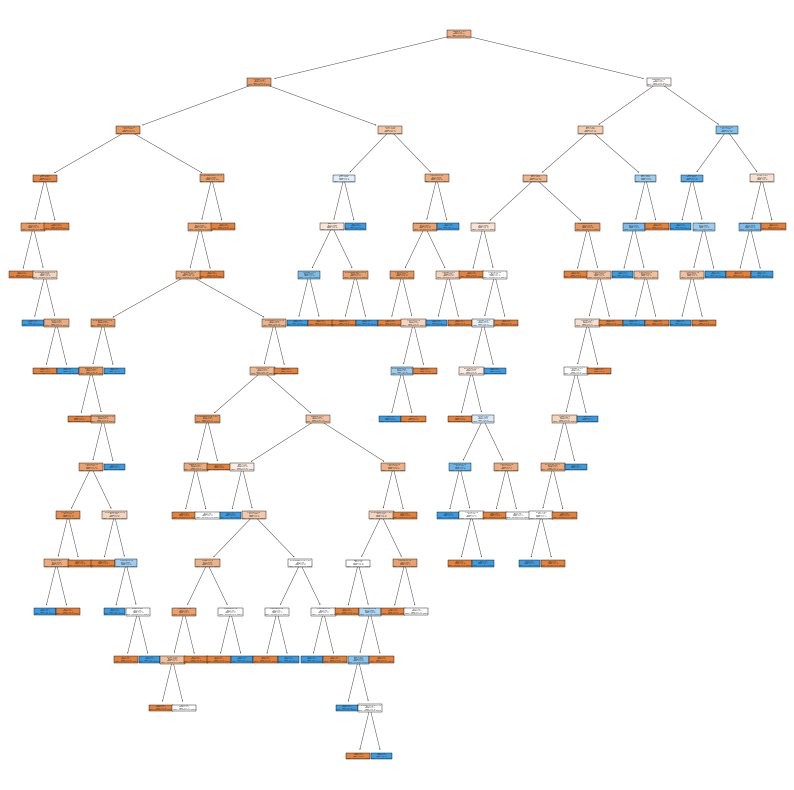

In [36]:
AD_previsores = ['breastquadleftup', 'breastquadcentral', 'breastquadhleftlow', 'breastquadhrightup', 'breastquadhrightdown', 'age', 'menopause', 'tumorsize', 'invnodes', 'nodecaps', 'degmalig', 'breast', 'irradiat']

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

tree.plot_tree(AD_modelo, feature_names=AD_previsores, class_names = AD_modelo.classes_, filled=True);

#### Naive Bayes

In [37]:
NB_X_treino = X_treino
NB_y_treino = y_treino

NB_X_teste = X_teste
NB_y_teste = y_teste

NB_modelo = GaussianNB()
NB_modelo.fit(X_treino, y_treino)

NB_previsoes = NB_modelo.predict(NB_X_teste)

In [38]:
accuracy_score(NB_y_teste, NB_previsoes)

0.7413793103448276

In [39]:
confusion_matrix(NB_y_teste, NB_previsoes)

array([[31,  5],
       [10, 12]], dtype=int64)

0.7413793103448276

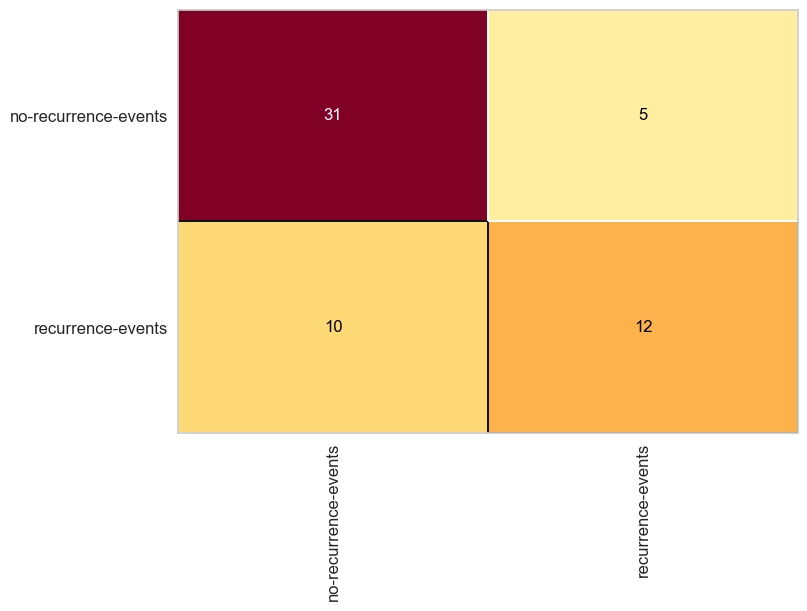

In [40]:
NB_cm = ConfusionMatrix(NB_modelo)
NB_cm.fit(NB_X_treino, NB_y_treino)
NB_cm.score(NB_X_teste, NB_y_teste)

In [41]:
print(classification_report(NB_y_teste, NB_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.86      0.81        36
   recurrence-events       0.71      0.55      0.62        22

            accuracy                           0.74        58
           macro avg       0.73      0.70      0.71        58
        weighted avg       0.74      0.74      0.73        58



#### Random Forest

In [42]:
RF_X_treino = X_treino
RF_y_treino = y_treino

RF_X_teste = X_teste
RF_y_teste = y_teste

RF_modelo = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
RF_modelo.fit(RF_X_treino, RF_y_treino)

RF_previsoes = RF_modelo.predict(RF_X_teste)

In [43]:
accuracy_score(RF_y_teste, RF_previsoes)

0.6896551724137931

In [44]:
confusion_matrix(RF_y_teste, RF_previsoes)

array([[32,  4],
       [14,  8]], dtype=int64)

0.6896551724137931

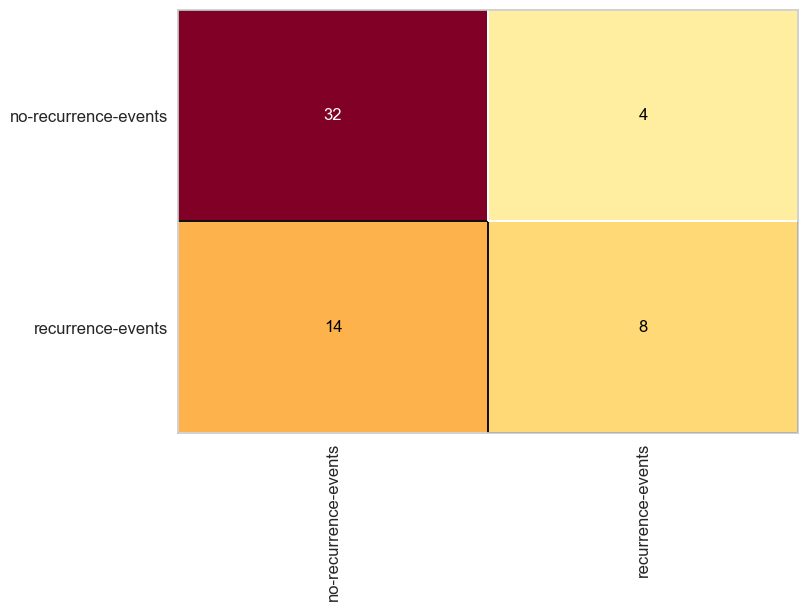

In [45]:
RF_cm = ConfusionMatrix(RF_modelo)
RF_cm.fit(RF_X_treino, RF_y_treino)
RF_cm.score(RF_X_teste, RF_y_teste)

In [46]:
print(classification_report(RF_y_teste, RF_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.89      0.78        36
   recurrence-events       0.67      0.36      0.47        22

            accuracy                           0.69        58
           macro avg       0.68      0.63      0.63        58
        weighted avg       0.68      0.69      0.66        58



### Treinamento com balanceamento dos dados usando um método undersampling

In [47]:
balanceamento_under = TomekLinks(sampling_strategy='auto')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [48]:
X_under.shape, y_under.shape

((211, 13), (211,))

In [49]:
np.unique(y_treino, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165,  63], dtype=int64))

In [50]:
np.unique(y_under, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([148,  63], dtype=int64))

#### Árvore de Decisão

In [51]:
AD2_X_under = X_under
AD2_y_under = y_under

AD2_X_teste = X_teste
AD2_y_teste = y_teste

AD2_modelo = DecisionTreeClassifier(criterion='gini')
AD2_modelo.fit(AD2_X_under, AD2_y_under)

DecisionTreeClassifier()

In [52]:
AD2_previsoes = AD2_modelo.predict(AD2_X_teste)

In [53]:
accuracy_score(AD2_y_teste, AD2_previsoes)

0.5862068965517241

In [54]:
confusion_matrix(AD2_y_teste, AD2_previsoes)

array([[27,  9],
       [15,  7]], dtype=int64)

0.5862068965517241

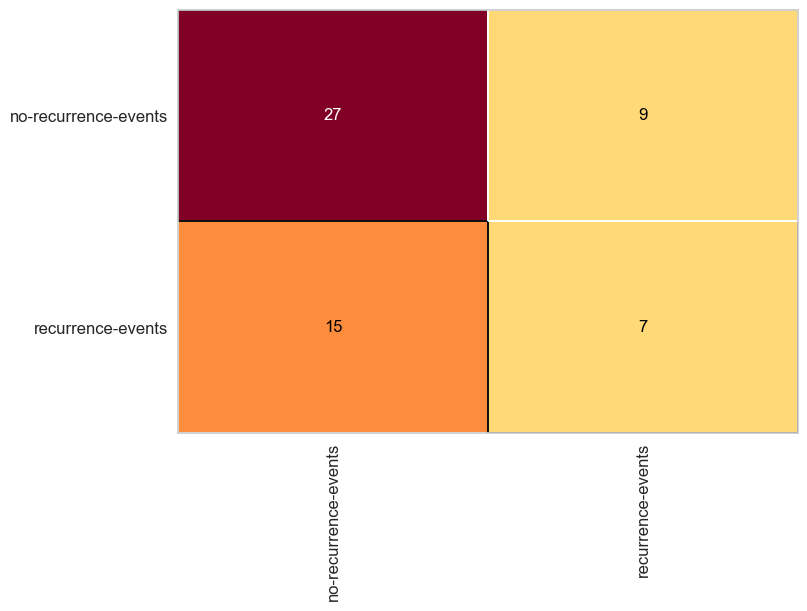

In [55]:
AD2_cm = ConfusionMatrix(AD2_modelo)
AD2_cm.fit(AD2_X_under, AD2_y_under)
AD2_cm.score(AD2_X_teste, AD2_y_teste)

In [56]:
print(classification_report(AD2_y_teste, AD2_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.64      0.75      0.69        36
   recurrence-events       0.44      0.32      0.37        22

            accuracy                           0.59        58
           macro avg       0.54      0.53      0.53        58
        weighted avg       0.56      0.59      0.57        58



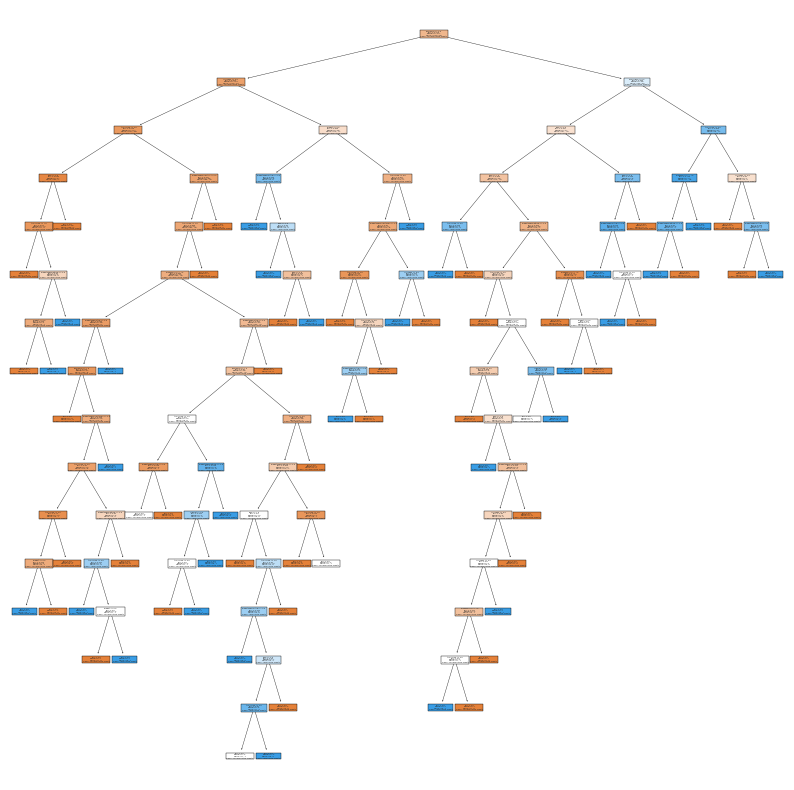

In [57]:
AD2_previsores = ['breastquadleftup', 'breastquadcentral', 'breastquadhleftlow', 'breastquadhrightup', 'breastquadhrightdown', 'age', 'menopause', 'tumorsize', 'invnodes', 'nodecaps', 'degmalig', 'breast', 'irradiat']

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

tree.plot_tree(AD2_modelo, feature_names=AD2_previsores, class_names = AD2_modelo.classes_, filled=True);

#### Naive Bayes

In [58]:
NB2_X_under = X_under
NB2_y_under = y_under

NB2_X_teste = X_teste
NB2_y_teste = y_teste

NB2_modelo = GaussianNB()
NB2_modelo.fit(NB2_X_under, NB2_y_under)

NB2_previsoes = NB2_modelo.predict(NB2_X_teste)

In [59]:
accuracy_score(NB2_y_teste,NB2_previsoes)

0.7586206896551724

In [60]:
confusion_matrix(NB2_y_teste, NB2_previsoes)

array([[31,  5],
       [ 9, 13]], dtype=int64)

0.7586206896551724

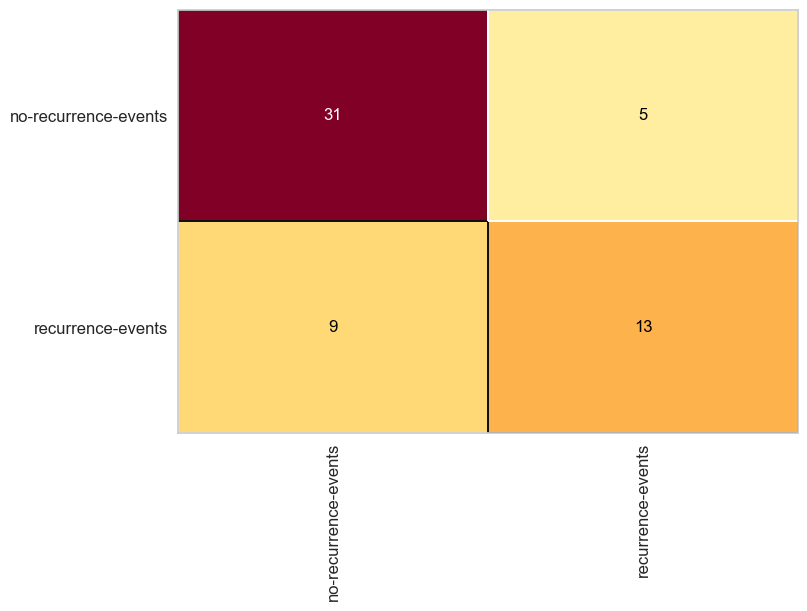

In [61]:
NB2_cm = ConfusionMatrix(NB2_modelo)
NB2_cm.fit(NB2_X_under, NB2_y_under)
NB2_cm.score(NB2_X_teste, NB2_y_teste)

In [62]:
print(classification_report(NB2_y_teste, NB2_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.86      0.82        36
   recurrence-events       0.72      0.59      0.65        22

            accuracy                           0.76        58
           macro avg       0.75      0.73      0.73        58
        weighted avg       0.75      0.76      0.75        58



#### Random Forest

In [63]:
RF2_X_under = X_under
RF2_y_under = y_under

RF2_X_teste = X_teste
RF2_y_teste = y_teste

RF2_modelo = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
RF2_modelo.fit(RF2_X_under, RF2_y_under)

RF2_previsoes = RF2_modelo.predict(RF2_X_teste)

In [64]:
accuracy_score(RF2_y_teste, RF2_previsoes)

0.7413793103448276

In [65]:
confusion_matrix(RF2_y_teste, RF2_previsoes)

array([[32,  4],
       [11, 11]], dtype=int64)

0.7413793103448276

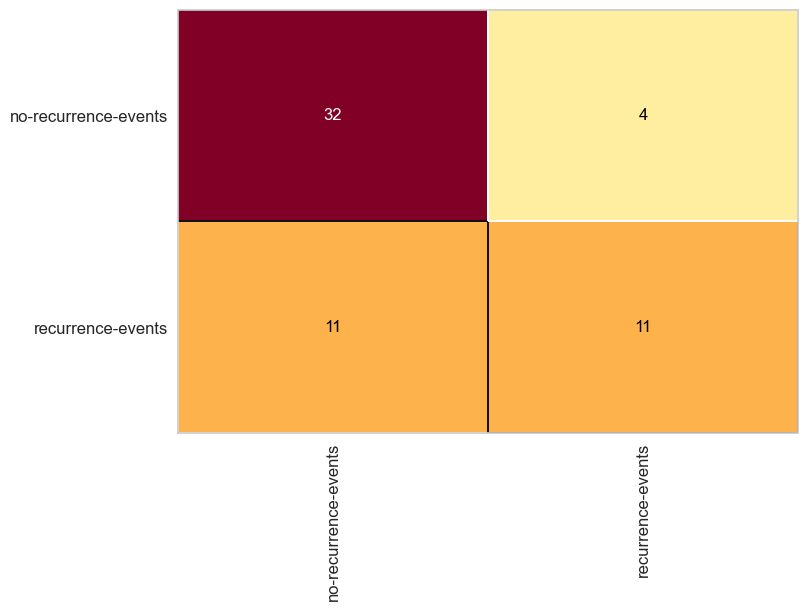

In [66]:
RF2_cm = ConfusionMatrix(RF2_modelo)
RF2_cm.fit(RF2_X_under, RF2_y_under)
RF2_cm.score(RF2_X_teste, RF2_y_teste)

In [67]:
print(classification_report(RF2_y_teste, RF2_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.74      0.89      0.81        36
   recurrence-events       0.73      0.50      0.59        22

            accuracy                           0.74        58
           macro avg       0.74      0.69      0.70        58
        weighted avg       0.74      0.74      0.73        58



### Treinamento com balanceamento de dados usando o método oversampling

In [68]:
# Randomly over sample the minority class
balanceamento_over = SMOTE(sampling_strategy = 'auto')
X_over, y_over = balanceamento_over.fit_resample(X_treino, y_treino)

In [69]:
X_over.shape, y_over.shape

((330, 13), (330,))

In [70]:
np.unique(y_treino, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165,  63], dtype=int64))

In [71]:
np.unique(y_over, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165, 165], dtype=int64))

#### Árvore de Decisão

In [72]:
AD3_X_over = X_over
AD3_y_over = y_over

AD3_X_teste = X_teste
AD3_y_teste = y_teste

AD3_modelo = DecisionTreeClassifier(criterion = 'gini')
AD3_modelo.fit(AD3_X_over, AD3_y_over)

DecisionTreeClassifier()

In [73]:
AD3_previsoes = AD3_modelo.predict(AD3_X_teste)

In [74]:
accuracy_score(AD3_y_teste, AD3_previsoes)

0.6206896551724138

In [75]:
confusion_matrix(AD3_y_teste, AD3_previsoes)

array([[25, 11],
       [11, 11]], dtype=int64)

0.6206896551724138

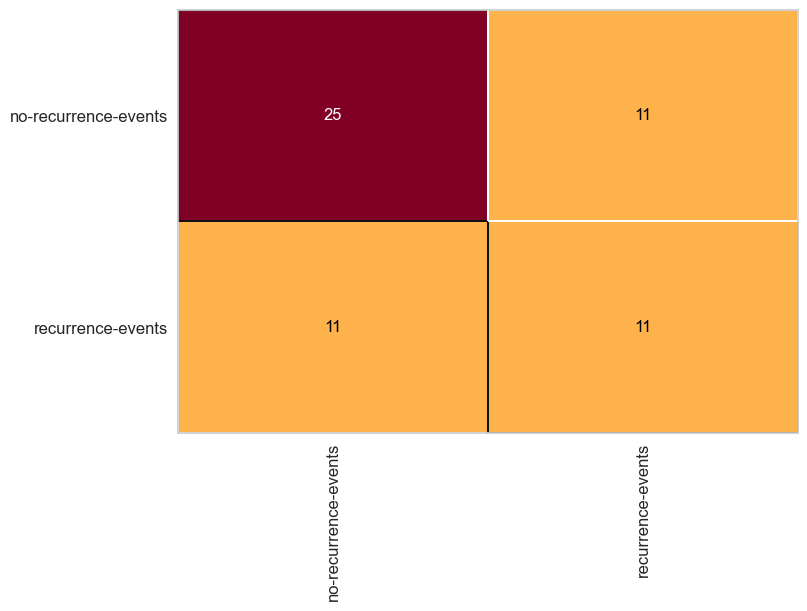

In [76]:
AD3_cm = ConfusionMatrix(AD3_modelo)
AD3_cm.fit(AD3_X_over, AD3_y_over)
AD3_cm.score(AD3_X_teste, AD3_y_teste)

In [77]:
print(classification_report(AD3_y_teste, AD3_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.69      0.69      0.69        36
   recurrence-events       0.50      0.50      0.50        22

            accuracy                           0.62        58
           macro avg       0.60      0.60      0.60        58
        weighted avg       0.62      0.62      0.62        58



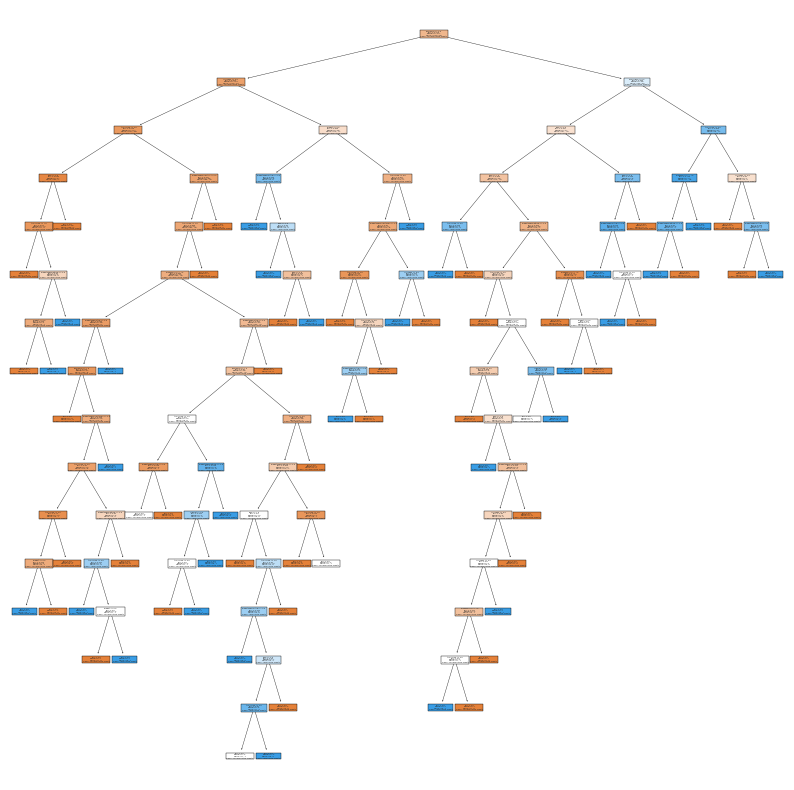

In [78]:
AD3_previsores = ['breastquadleftup', 'breastquadcentral', 'breastquadhleftlow', 'breastquadhrightup', 'breastquadhrightdown', 'age', 'menopause', 'tumorsize', 'invnodes', 'nodecaps', 'degmalig', 'breast', 'irradiat']

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

tree.plot_tree(AD2_modelo, feature_names=AD3_previsores, class_names = AD3_modelo.classes_, filled=True);

#### Naive Bayes

In [79]:
NB3_X_over = X_over
NB3_y_over = y_over

NB3_X_teste = X_teste
NB3_y_teste = y_teste

NB3_modelo = GaussianNB()
NB3_modelo.fit(NB3_X_over, NB3_y_over)

NB3_previsoes = NB3_modelo.predict(NB3_X_teste)

In [80]:
accuracy_score(NB3_y_teste,NB3_previsoes)

0.6724137931034483

In [81]:
confusion_matrix(NB3_y_teste, NB3_previsoes)

array([[25, 11],
       [ 8, 14]], dtype=int64)

0.6724137931034483

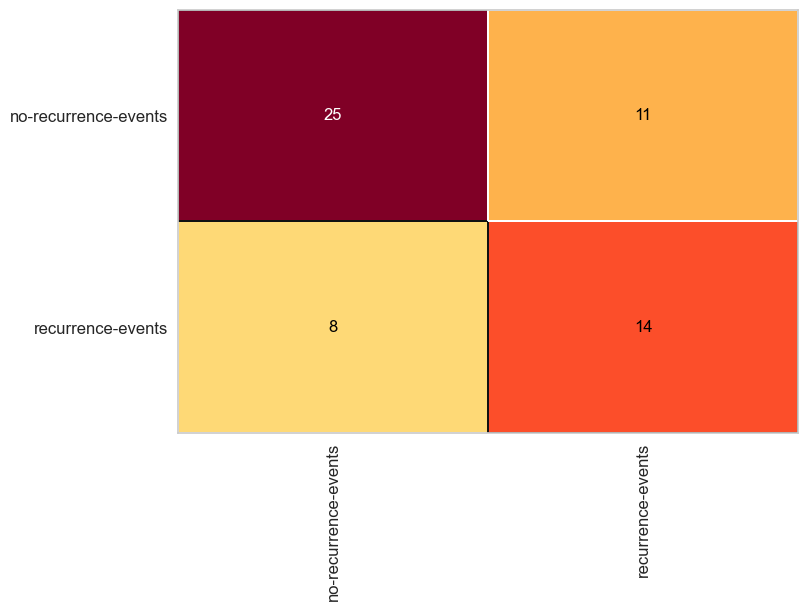

In [82]:
NB3_cm = ConfusionMatrix(NB3_modelo)
NB3_cm.fit(NB3_X_over, NB3_y_over)
NB3_cm.score(NB3_X_teste, NB3_y_teste)

In [83]:
print(classification_report(NB3_y_teste, NB3_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.69      0.72        36
   recurrence-events       0.56      0.64      0.60        22

            accuracy                           0.67        58
           macro avg       0.66      0.67      0.66        58
        weighted avg       0.68      0.67      0.68        58



#### Random Forest

In [84]:
RF3_X_over = X_over
RF3_y_over = y_over

RF3_X_teste = X_teste
RF3_y_teste = y_teste

RF3_modelo = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
RF3_modelo.fit(RF3_X_over, RF3_y_over)

RF3_previsoes = RF3_modelo.predict(RF3_X_teste)

In [85]:
accuracy_score(RF3_y_teste, RF3_previsoes)

0.7241379310344828

In [86]:
confusion_matrix(RF2_y_teste, RF2_previsoes)

array([[32,  4],
       [11, 11]], dtype=int64)

0.7241379310344828

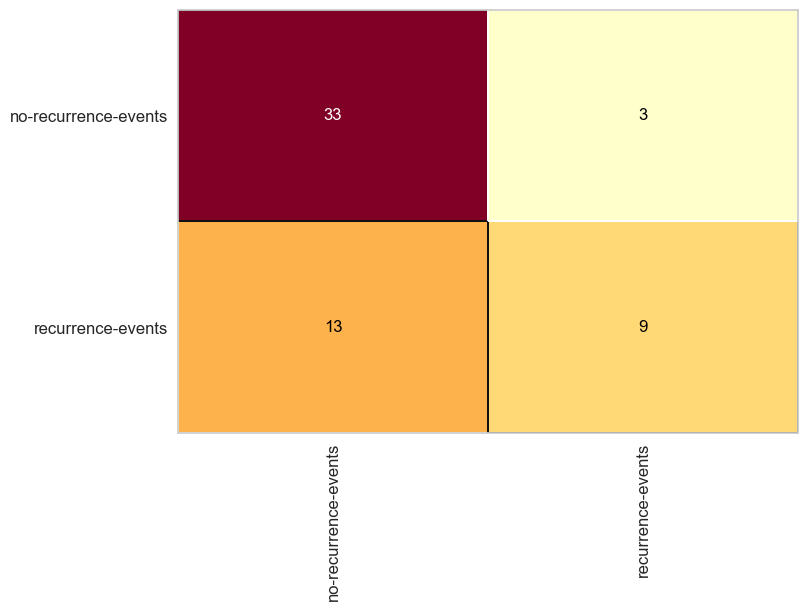

In [87]:
RF3_cm = ConfusionMatrix(RF3_modelo)
RF3_cm.fit(RF3_X_over, RF3_y_over)
RF3_cm.score(RF3_X_teste, RF3_y_teste)

In [88]:
print(classification_report(RF3_y_teste, RF3_previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.72      0.92      0.80        36
   recurrence-events       0.75      0.41      0.53        22

            accuracy                           0.72        58
           macro avg       0.73      0.66      0.67        58
        weighted avg       0.73      0.72      0.70        58

